<a href="https://colab.research.google.com/github/sivaperumal12/sivsankar/blob/master/shiva3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

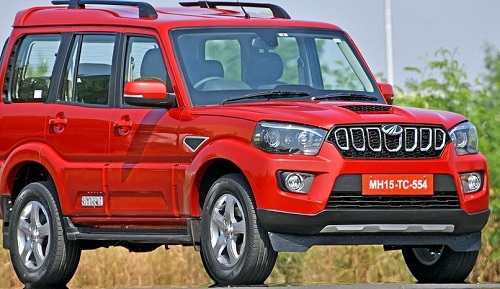

AttributeError: ignored

In [38]:
import cv2
import numpy as np
import os
import DetectChars
import DetectPlates
import PossiblePlate
img = cv2.imread('1.jpeg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
# module level variables 
SCALAR_BLACK = (0, 0, 0)
SCALAR_WHITE = (255.0, 255.0, 255.0)
SCALAR_YELLOW = (0.0, 255.0, 255.0)
SCALAR_GREEN = (0.0, 255.0, 0.0)
SCALAR_RED = (0.0, 0.0, 255.0)

showSteps = False
def main():

    blnKNNTrainingSuccessful = DetectChars.loadKNNDataAndTrainKNN()         # attempt KNN training

    if blnKNNTrainingSuccessful == False:                               # if KNN training was not successful
        print("\nerror: KNN traning was not successful\n")  # show error message
        return                                                          # and exit program
    # end if

    imgOriginalScene  = cv2.imread("1.jpeg")               # open image

    if imgOriginalScene is None:  
      # if image was not read successfully
        print("\nerror: image not read from file \n\n")  # print error message to std out
        os.system("pause")                                  # pause so user can see error message
        return                                              # and exit program
    # end if

    listOfPossiblePlates = DetectPlates.detectPlatesInScene(imgOriginalScene)           # detect plates

    listOfPossiblePlates = DetectChars.detectCharsInPlates(listOfPossiblePlates)        # detect chars in plates

    cv2.imshow("imgOriginalScene", imgOriginalScene)            # show scene image

    if len(listOfPossiblePlates) == 0:                          # if no plates were found
        print("\nno license plates were detected\n")  # inform user no plates were found
    else:                                                       # else
                # if we get in here list of possible plates has at leat one plate

                # sort the list of possible plates in DESCENDING order (most number of chars to least number of chars)
        listOfPossiblePlates.sort(key = lambda possiblePlate: len(possiblePlate.strChars), reverse = True)

                # suppose the plate with the most recognized chars (the first plate in sorted by string length descending order) is the actual plate
        licPlate = listOfPossiblePlates[0]

        cv2.imshow("imgPlate", licPlate.imgPlate)           # show crop of plate and threshold of plate
        cv2.imshow("imgThresh", licPlate.imgThresh)

        if len(licPlate.strChars) == 0:                     # if no chars were found in the plate
            print("\nno characters were detected\n\n")  # show message
            return                                          # and exit program
        # end if

        drawRedRectangleAroundPlate(imgOriginalScene, licPlate)             # draw red rectangle around plate

        print("\nlicense plate read from image = " + licPlate.strChars + "\n")  # write license plate text to std out
        print("----------------------------------------")

        writeLicensePlateCharsOnImage(imgOriginalScene, licPlate)           # write license plate text on the image

        cv2.imshow("imgOriginalScene", imgOriginalScene)                # re-show scene image

        cv2.imwrite("imgOriginalScene.png", imgOriginalScene)           # write image out to file

    # end if else

    cv2.waitKey(0)					# hold windows open until user presses a key

    return
# end main
def drawRedRectangleAroundPlate(imgOriginalScene, licPlate):

    p2fRectPoints = cv2.boxPoints(licPlate.rrLocationOfPlateInScene)            # get 4 vertices of rotated rect

    cv2.line(imgOriginalScene, tuple(p2fRectPoints[0]), tuple(p2fRectPoints[1]), SCALAR_RED, 2)         # draw 4 red lines
    cv2.line(imgOriginalScene, tuple(p2fRectPoints[1]), tuple(p2fRectPoints[2]), SCALAR_RED, 2)
    cv2.line(imgOriginalScene, tuple(p2fRectPoints[2]), tuple(p2fRectPoints[3]), SCALAR_RED, 2)
    cv2.line(imgOriginalScene, tuple(p2fRectPoints[3]), tuple(p2fRectPoints[0]), SCALAR_RED, 2)
# end function
def writeLicensePlateCharsOnImage(imgOriginalScene, licPlate):
    ptCenterOfTextAreaX = 0                             # this will be the center of the area the text will be written to
    ptCenterOfTextAreaY = 0

    ptLowerLeftTextOriginX = 0                          # this will be the bottom left of the area that the text will be written to
    ptLowerLeftTextOriginY = 0

    sceneHeight, sceneWidth, sceneNumChannels = imgOriginalScene.shape
    plateHeight, plateWidth, plateNumChannels = licPlate.imgPlate.shape

    intFontFace = cv2.FONT_HERSHEY_SIMPLEX                      # choose a plain jane font
    fltFontScale = float(plateHeight) / 30.0                    # base font scale on height of plate area
    intFontThickness = int(round(fltFontScale * 1.5))           # base font thickness on font scale

    textSize, baseline = cv2.getTextSize(licPlate.strChars, intFontFace, fltFontScale, intFontThickness)        # call getTextSize

            # unpack roatated rect into center point, width and height, and angle
    ( (intPlateCenterX, intPlateCenterY), (intPlateWidth, intPlateHeight), fltCorrectionAngleInDeg ) = licPlate.rrLocationOfPlateInScene

    intPlateCenterX = int(intPlateCenterX)              # make sure center is an integer
    intPlateCenterY = int(intPlateCenterY)

    ptCenterOfTextAreaX = int(intPlateCenterX)         # the horizontal location of the text area is the same as the plate

    if intPlateCenterY < (sceneHeight * 0.75):                                                  # if the license plate is in the upper 3/4 of the image
        ptCenterOfTextAreaY = int(round(intPlateCenterY)) + int(round(plateHeight * 1.6))      # write the chars in below the plate
    else:                                                                                       # else if the license plate is in the lower 1/4 of the image
        ptCenterOfTextAreaY = int(round(intPlateCenterY)) - int(round(plateHeight * 1.6))      # write the chars in above the plate
    # end if

    textSizeWidth, textSizeHeight = textSize                # unpack text size width and height

    ptLowerLeftTextOriginX = int(ptCenterOfTextAreaX - (textSizeWidth / 2))           # calculate the lower left origin of the text area
    ptLowerLeftTextOriginY = int(ptCenterOfTextAreaY + (textSizeHeight / 2))          # based on the text area center, width, and height

            # write the text on the image
    cv2.putText(imgOriginalScene, licPlate.strChars, (ptLowerLeftTextOriginX, ptLowerLeftTextOriginY), intFontFace, fltFontScale, SCALAR_YELLOW, intFontThickness)
# end function
if __name__ == "__main__":
    main()


